In [1]:
from tifffile import imread
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage.exposure import equalize_adapthist

In [2]:
images = []
for file in sorted(os.listdir("/home/paysan_d/test/")):
    images.append(imread(os.path.join("/home/paysan_d/test/", file)))

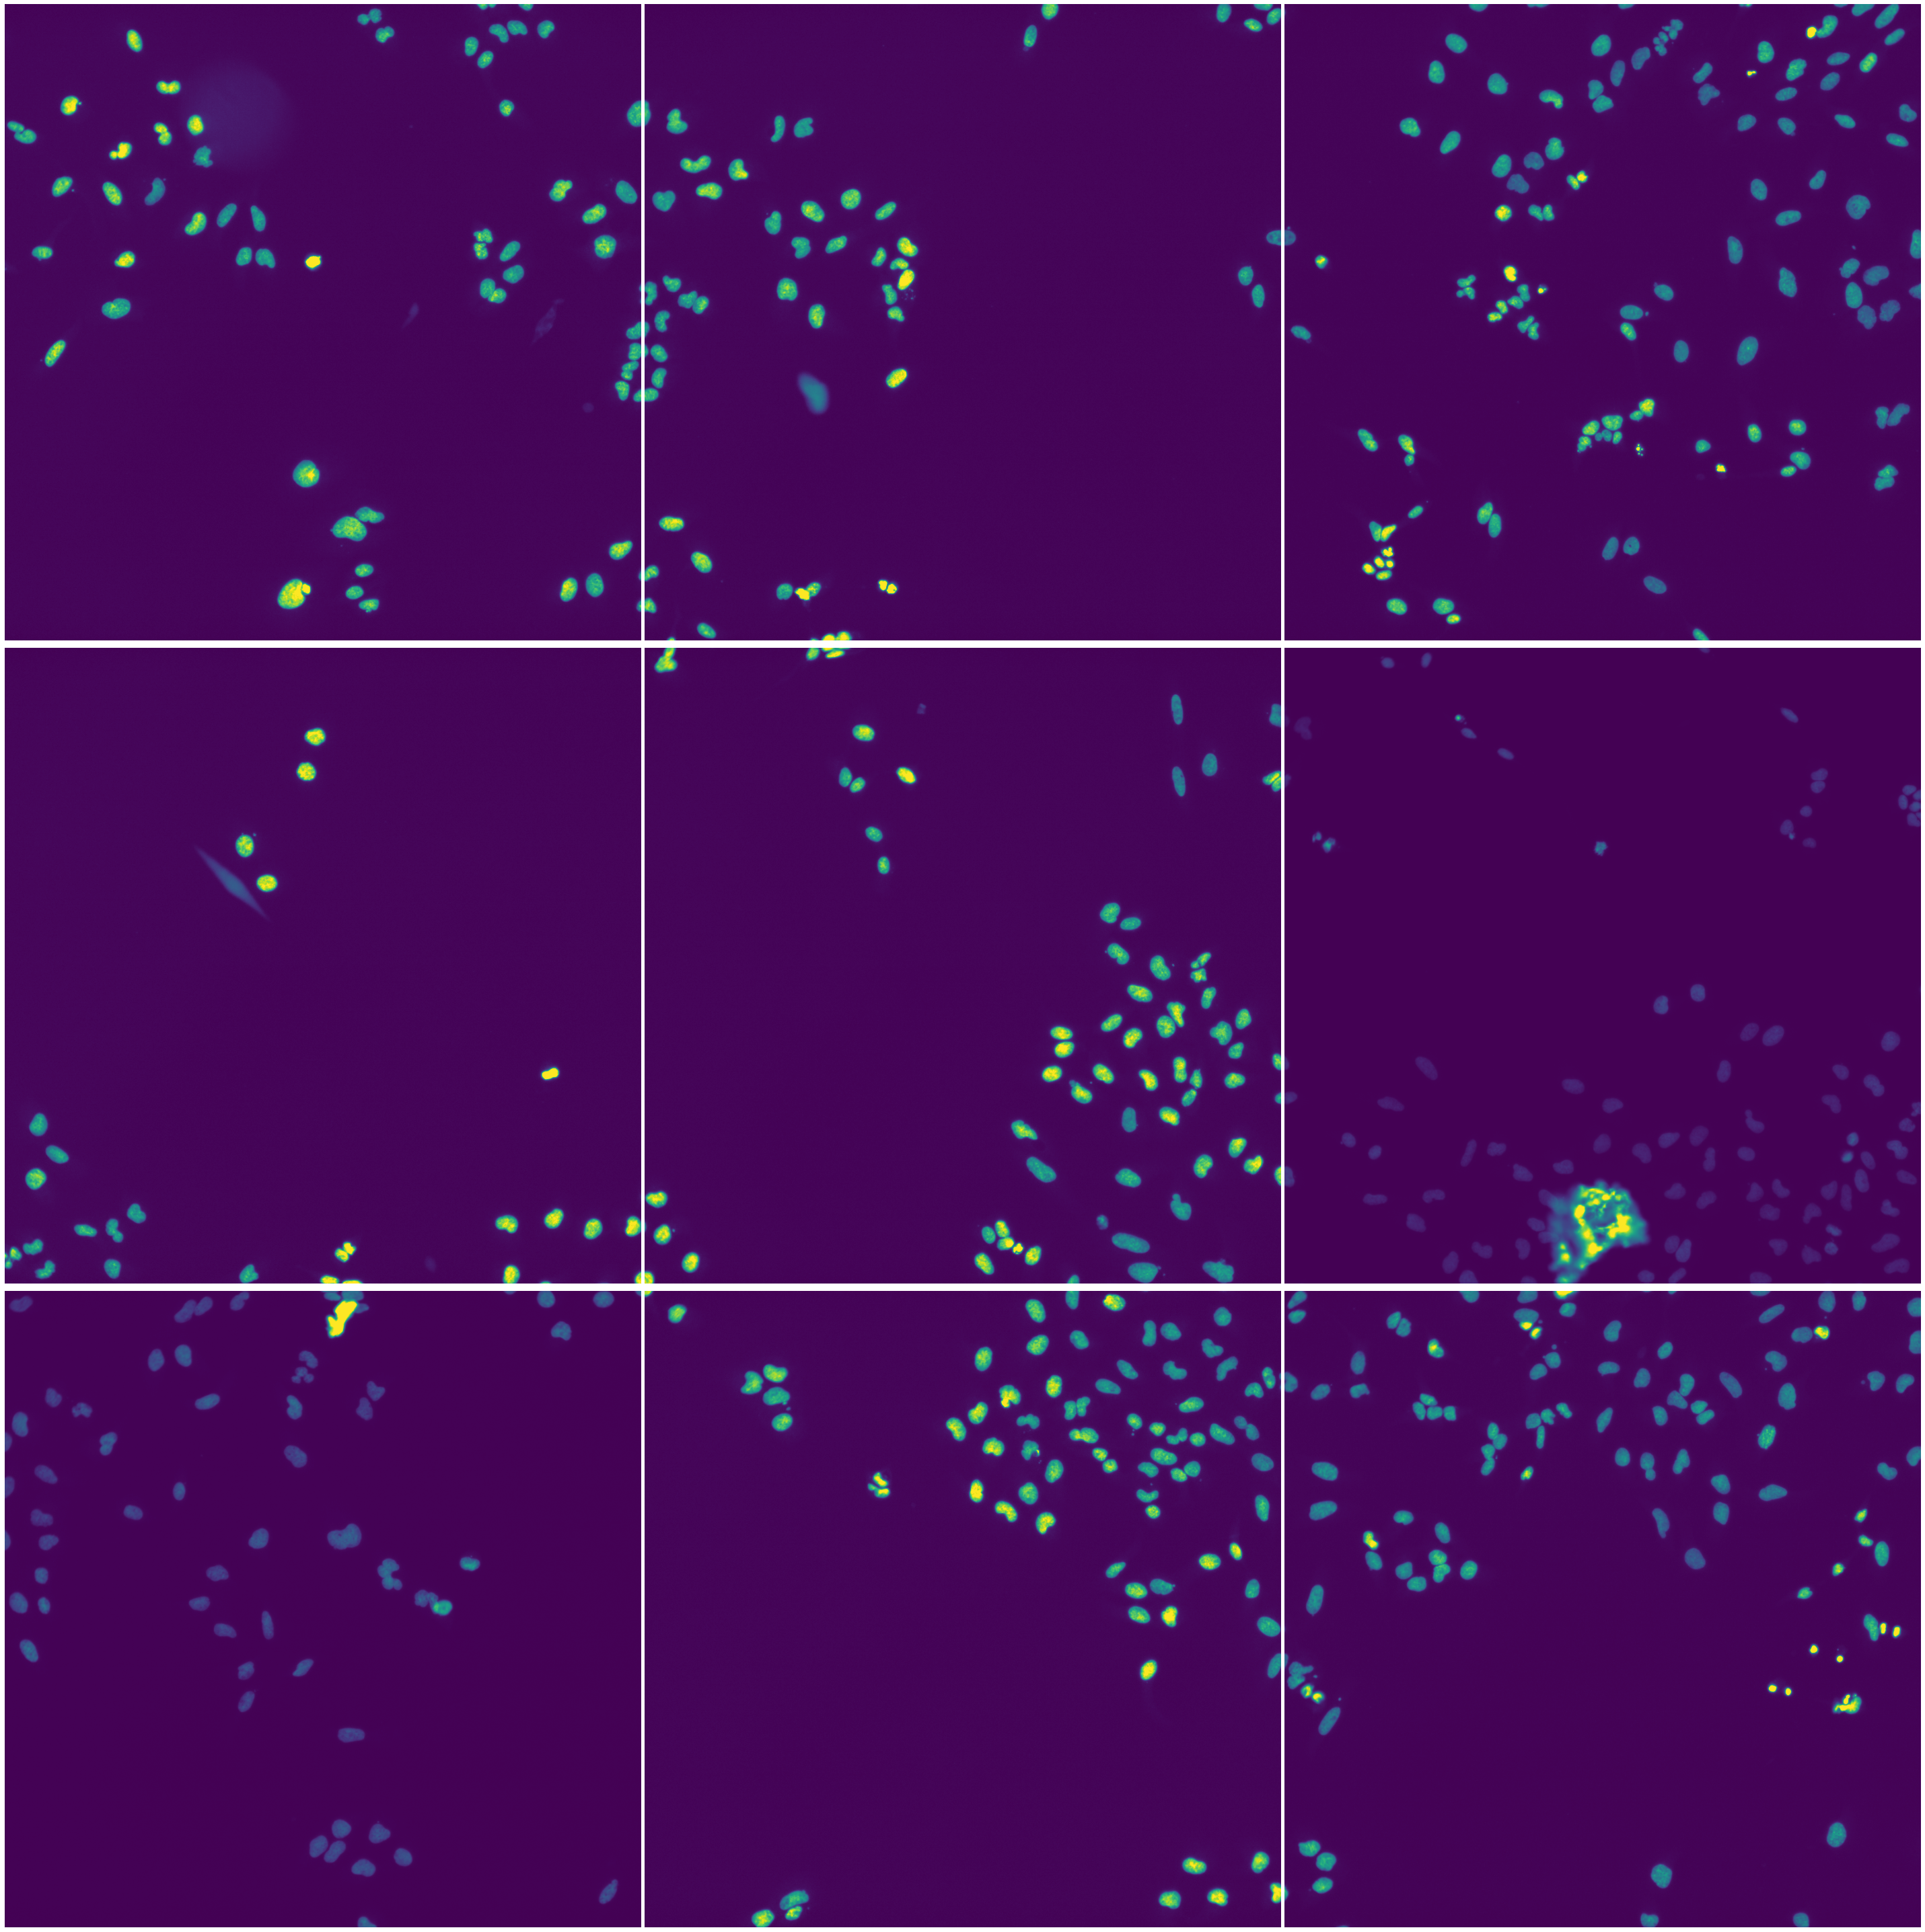

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[40,40])
ax = ax.flatten()
for i in range(len(images)):
    im = images[i]
#     flat = im.flatten()
#     masked = flat[flat < np.percentile(flat, 99.99)]
#     mean = np.mean(masked)
#     std = np.std(masked)
#     norm = (im - mean)/std
#     print(norm.max(), norm.min())
#     
    norm= im
    #norm = equalize_adapthist(im, clip_limit=0.01)
    #norm = (im - im.min())/(im.max()-im.min())
    norm = (norm-np.percentile(norm, 0.1))/(np.percentile(norm, 99.9)-np.percentile(norm, 0.1))
    norm = np.clip(norm, 0,1)
    ax[i].imshow(norm, vmin = 0, vmax=1, cmap="viridis")
    ax[i].axis("off")
fig.tight_layout()
plt.show()